In [43]:
import pandas as pd 

In [44]:
import numpy as np

In [45]:
import matplotlib

In [46]:
from matplotlib import pyplot as plt

In [47]:
import sklearn
from sklearn import linear_model

In [48]:
data=pd.read_excel("homeprice_multixl.xlsx")
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [49]:
data.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [50]:
m=data['bedrooms'].mean()
m

4.2

In [51]:
data.fillna(m,inplace=True)
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [52]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import seaborn  as sns

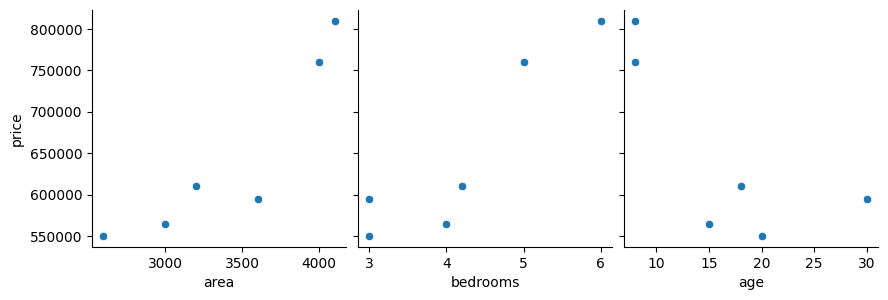

In [54]:
sns.pairplot(data,x_vars=['area','bedrooms','age'],y_vars=['price'],height=3,aspect=1)

In [55]:
model=linear_model.LinearRegression()
model

LinearRegression()

In [56]:
model.fit(data[['area','bedrooms','age']],data.price)

LinearRegression()

In [57]:
x=data[['area','bedrooms','age']]
y=data.price

In [58]:
model.predict([[3000,4,15]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([601483.40843428])

In [59]:
model.predict([[4000,5,16]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([733233.45089272])

In [60]:
model.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [61]:
model.intercept_

231586.00639409182

## saving

In [62]:
import pickle
pickle.dump(model,open('hotel','wb'))

In [63]:
import joblib
joblib.dump(model,'joblib_model_multi')

['joblib_model_multi']

In [64]:
model.score(x,y)

0.9540926625396438

## dummy encoding

In [65]:
data=pd.read_csv('homeprice_w_cities.xls')
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


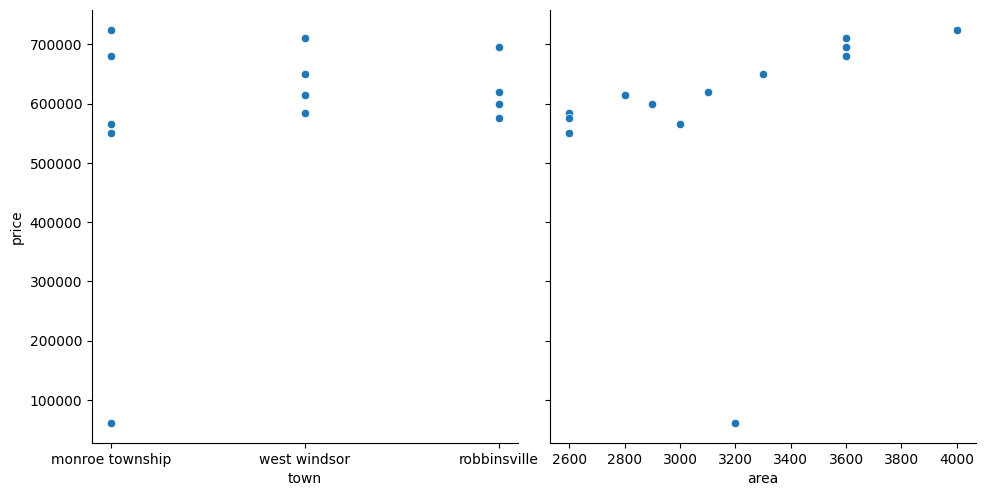

In [66]:
sns.pairplot(data,x_vars=['town','area'],y_vars=['price'],height=5,aspect=1)

In [67]:
dummies=pd.get_dummies(data.town)
dummies

,monroe township,robbinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [68]:
merge=pd.concat([data,dummies],axis=1)
merge

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,61000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robbinsville,2600,575000,False,True,False


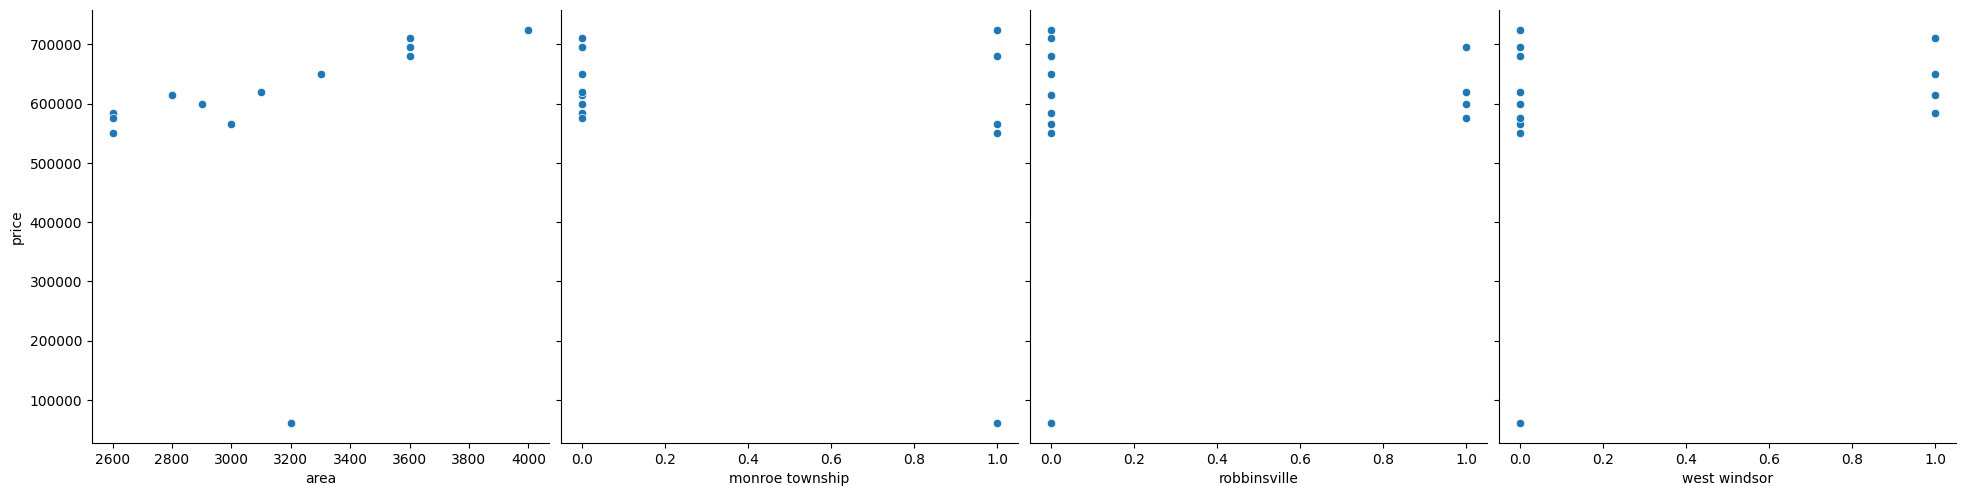

In [69]:
sns.pairplot(merge,x_vars=['area','monroe township','robbinsville','west windsor'],y_vars=['price'],height=5,aspect=1)

In [70]:
merge.columns

Index(['town', 'area', 'price', 'monroe township', 'robbinsville',
       'west windsor'],
      dtype='object')

In [71]:
merge

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,61000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robbinsville,2600,575000,False,True,False


In [72]:
x=merge[['area','monroe township','robbinsville','west windsor']]
x

,area,monroe township,robbinsville,west windsor
0,2600,True,False,False
1,3000,True,False,False
2,3200,True,False,False
3,3600,True,False,False
4,4000,True,False,False
5,2600,False,False,True
6,2800,False,False,True
7,3300,False,False,True
8,3600,False,False,True
9,2600,False,True,False


In [73]:
#x=merge.drop(['price'],axis=1)
x

,area,monroe township,robbinsville,west windsor
0,2600,True,False,False
1,3000,True,False,False
2,3200,True,False,False
3,3600,True,False,False
4,4000,True,False,False
5,2600,False,False,True
6,2800,False,False,True
7,3300,False,False,True
8,3600,False,False,True
9,2600,False,True,False


In [74]:
y=merge.price
y

0     550000
1     565000
2      61000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [75]:
h_model=linear_model.LinearRegression()
h_model

LinearRegression()

In [76]:
h_model.fit(x,y)

LinearRegression()

In [77]:
h_model.predict([[70000,1,0,0]])


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10242888.62609376])

In [78]:
h_model.score(x,y)

0.26760244239734743

In [80]:
h_model.coef_

array([   145.78370243, -97838.63685229,  41991.61470651,  55847.02214578])

In [81]:
h_model.intercept_

135868.09288363444

## one hot encoding

In [95]:
df= data
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [92]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
encoder=OneHotEncoder()

In [97]:
encoder_value=encoder.fit_transform(data[['town']]).toarray()

In [98]:
encoder_value

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [100]:
encoder_data=pd.DataFrame(encoder_value,columns=['monroe township','robbinsville','west windsor'])

In [102]:
merge=data.join(encoder_data)
merge

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1.0,0.0,0.0
1,monroe township,3000,565000,1.0,0.0,0.0
2,monroe township,3200,61000,1.0,0.0,0.0
3,monroe township,3600,680000,1.0,0.0,0.0
4,monroe township,4000,725000,1.0,0.0,0.0
5,west windsor,2600,585000,0.0,0.0,1.0
6,west windsor,2800,615000,0.0,0.0,1.0
7,west windsor,3300,650000,0.0,0.0,1.0
8,west windsor,3600,710000,0.0,0.0,1.0
9,robbinsville,2600,575000,0.0,1.0,0.0


In [103]:
type(merge)

pandas.core.frame.DataFrame

In [104]:
merge=merge.drop(['town'],axis=1)
merge
                 

,area,price,monroe township,robbinsville,west windsor
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,61000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [106]:
x=merge.drop(['price'],axis=1)
x

,area,monroe township,robbinsville,west windsor
0,2600,1.0,0.0,0.0
1,3000,1.0,0.0,0.0
2,3200,1.0,0.0,0.0
3,3600,1.0,0.0,0.0
4,4000,1.0,0.0,0.0
5,2600,0.0,0.0,1.0
6,2800,0.0,0.0,1.0
7,3300,0.0,0.0,1.0
8,3600,0.0,0.0,1.0
9,2600,0.0,1.0,0.0


In [107]:
y=merge.price
y

0     550000
1     565000
2      61000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [108]:
one_hot_model=linear_model.LinearRegression()
one_hot_model

LinearRegression()

In [111]:
one_hot_model.fit(x,y)

LinearRegression()

In [112]:
one_hot_model.score(x,y)


0.26760244239734743

In [113]:
one_hot_model.predict([[80000,1,0,0]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11700725.65038839])

In [115]:
ypredict=one_hot_model.predict(x)
ypredict

array([417067.08234795, 475380.56331973, 504537.30380563, 562850.78477741,
       621164.2657492 , 570752.74134601, 599909.48183191, 672801.33304664,
       716536.44377548, 556897.33390675, 600632.44463559, 629789.18512148,
       702681.03633622])

In [ ]:
plt.scatter